In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
import os

# Load Dataset
if not os.path.exists("natural_images.pt"):
    print("Error: natural_images.pt not found. Make sure you are running this from the task folder.")
else:
    dataset = torch.load("natural_images.pt", weights_only=False)
    orig_images = dataset["images"].numpy()
    labels = dataset["labels"].numpy()
    print("Dataset loaded.")

Dataset loaded.


In [4]:
# Find latest log
log_files = glob.glob('logs/*.json')
if not log_files:
    print("No logs found. Run 'python analyze_submission.py' first.")
else:
    latest_file = max(log_files, key=os.path.getctime)
    print(f"Loading log: {latest_file}")
    
    with open(latest_file, 'r') as f:
        data = json.load(f)
        
    print(f"Score: {data['leaderboard_score']:.4f}")
    print(f"Success Rate: {data['success_rate']}%")
    
    # Load Submission
    sub_file = data["submission_file"]
    if os.path.exists(sub_file):
        sub_data = np.load(sub_file)
        adv_images = sub_data["images"]
        print("Adversarial images loaded.")
    else:
        print(f"Error: Submission file {sub_file} not found.")

Loading log: logs/analysis_2025-11-22_17-19-21.json
Score: 1.0000
Success Rate: 0.0%
Adversarial images loaded.


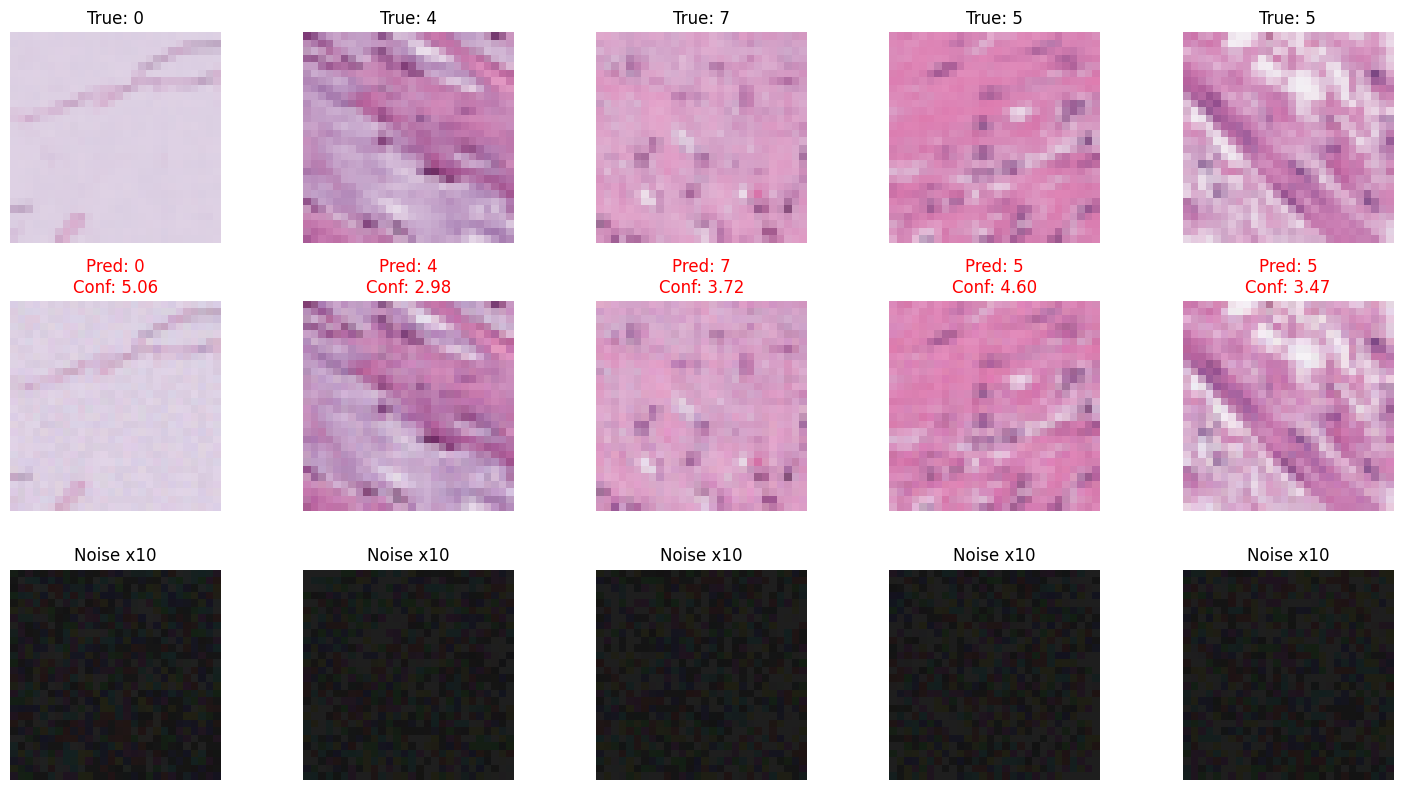

In [5]:
def show_results(start=0, count=5):
    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(range(start, start+count)):
        if idx >= 100: break
        
        # Original
        plt.subplot(3, count, i + 1)
        plt.imshow(orig_images[idx].transpose(1, 2, 0))
        plt.title(f"True: {labels[idx]}")
        plt.axis('off')
        
        # Adversarial
        plt.subplot(3, count, i + 1 + count)
        plt.imshow(adv_images[idx].transpose(1, 2, 0))
        
        # Prediction
        logit_info = data['details'][idx]
        pred = np.argmax(logit_info['logits'])
        conf = np.max(logit_info['logits'])
        col = 'green' if pred != labels[idx] else 'red'
        plt.title(f"Pred: {pred}\nConf: {conf:.2f}", color=col)
        plt.axis('off')
        
        # Noise
        plt.subplot(3, count, i + 1 + 2*count)
        diff = np.abs(adv_images[idx] - orig_images[idx])
        plt.imshow(diff.transpose(1, 2, 0) * 10) # Amplify
        plt.title("Noise x10")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_results(0, 5)